<h1>Visualization Movie Correlation with Python</h1>

In [176]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [177]:
# Read in the data

# Using Kaggle's "Movie Industry" Dataset
# https://www.kaggle.com/danielgrijalvas/movies/version/2

df = pd.read_csv(r'C:\Users\avist\OneDrive\Desktop\Coding\Python Correlation\movies.csv')

<h2><b>Initial Data Exploration</b></h2>

In [178]:
# Taking a look at our data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [179]:
# Checking for missing data

print ("Column\tNumber of Missing")
df.isnull().sum()

Column	Number of Missing


budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [180]:
# Data types of our columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

<h2><b>Cleaning up our Data</b></h2>

In [181]:
# Casting 'Budget'  and 'Gross' as integers

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [182]:
# Fixing discrepancies between 'Year' and year value of 'Released'

df['yearCorrect'] = df['released'].astype('str').str[:4]

In [183]:
# Drop any duplicates

df.drop_duplicates(keep='first', inplace=True)

<h2><b>Visualizating Existing Correlations</b></h2>

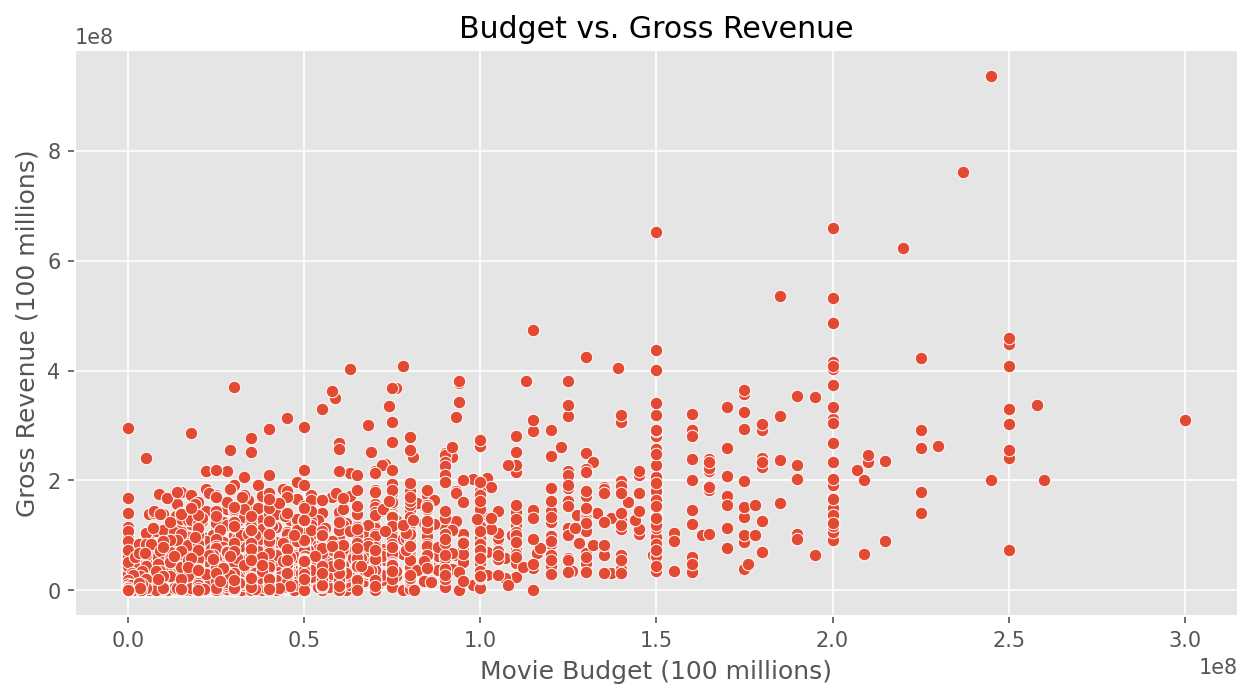

In [184]:
# Scatter plot for Budget and Gross

plt.figure(figsize=(10,5), dpi=150)
plt.title('Budget vs. Gross Revenue')
sns.scatterplot(data=df, x='budget',y='gross')
plt.xlabel('Movie Budget (100 millions)')
plt.ylabel('Gross Revenue (100 millions)')
plt.show()

In [185]:
# Looking at raw correlation between numeric columns

# Pearson method
df.corr(method='pearson') # Our preference

# Kendall method
#df.corr(method='kendall')

# Spearman method
#df.corr(method='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


<h3><b>Visualizing Correlation between Numeric Features</b></h3>

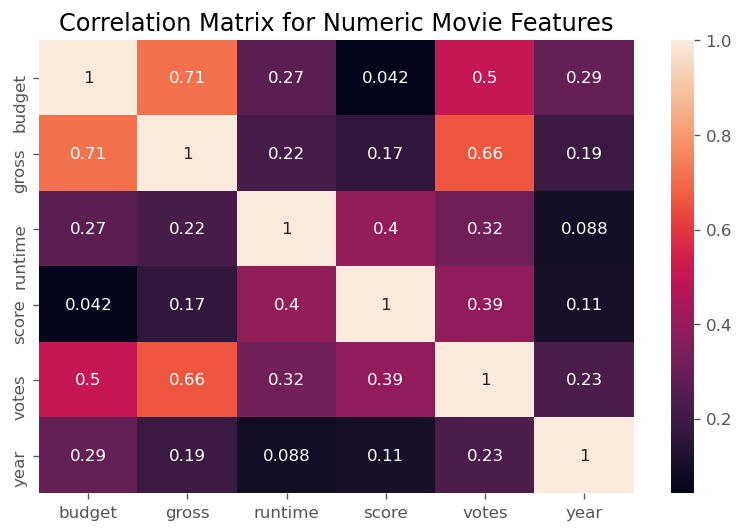

In [186]:
correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(8,5), dpi=120)
plt.title('Correlation Matrix for Numeric Movie Features')
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Pretty high correlations between...
    # Budget + Gross
    # Votes + Gross 

<h3><b>Visualizing Correlation between ALL Features</b></h3>

In [187]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [188]:
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearCorrect
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


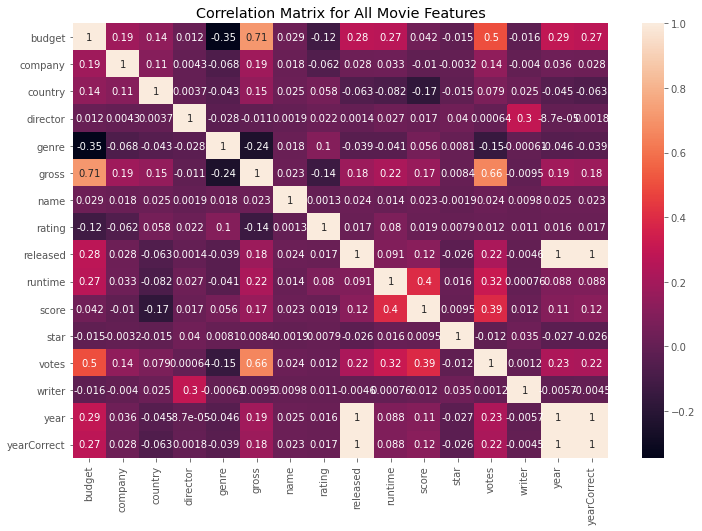

In [189]:
correlation_matrix2 = df_numerized.corr(method='pearson')

plt.figure(figsize=(12,8))
plt.title('Correlation Matrix for All Movie Features')
sns.heatmap(data=correlation_matrix2, annot=True)
plt.show()

In [190]:
pd.set_option('display.max_rows', None)
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
#corr_pairs

In [191]:
# Identifying high correlations (>0.5)

sorted_pairs = corr_pairs.sort_values(ascending=False)
high_corr = sorted_pairs[(sorted_pairs > 0.5)]
high_corr

budget       budget         1.000000
company      company        1.000000
year         year           1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
yearCorrect  yearCorrect    1.000000
             released       0.999389
released     yearCorrect    0.999389
yearCorrect  year           0.996229
year         yearCorrect    0.996229
             released       0.996187
released     year           0.996187
budget       gross          0.712196
gross        budget         0.712196
             votes          0.662457
votes        gross          0.662457
             budget         0.503924
b

In [192]:
# Double checking for any high NEGATIVE correlations as well

sorted_pairs[(abs(sorted_pairs) < 0.99) & (abs(sorted_pairs) > 0.5)]

budget  gross     0.712196
gross   budget    0.712196
        votes     0.662457
votes   gross     0.662457
        budget    0.503924
budget  votes     0.503924
dtype: float64

<h2><b>Conclusion</b></h2>

<t>Besides the correlations of identical features and the correlations between release dates (and our added column),</br>
we can see high correlations between...<br></t>
<ul>
    <li>Budget and Gross (~ 0.71)</li>
    <li>Votes and Gross (~ 0.66)</li>
    <li>Budget and Votes (~ 0.50)</li>
</ul>
<t>All of these were positive correlations as well.</t>